In [396]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [397]:
dataset=pd.read_csv(r"C:\Users\KIIT\Desktop\Bank-Marketing-Efficiency-Analysis-master\bank-additional-full.csv",sep=';',quotechar='"', encoding ='utf8')

In [398]:
dataset.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [399]:
dataset['y'].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [400]:
job = pd.get_dummies(dataset.job,drop_first = True)
merged=pd.concat([job,dataset],axis=1)
final=merged.drop(['job'],axis=1)

marital = pd.get_dummies(dataset['marital'],drop_first=True)
merged=pd.concat([marital,final],axis=1)
final=merged.drop(['marital'],axis=1)

education = pd.get_dummies(dataset['education'],drop_first=True)
merged=pd.concat([education,final],axis=1)
final=merged.drop(['education'],axis=1)

default = pd.get_dummies(dataset['default'],drop_first=True)
merged=pd.concat([default,final],axis=1)
final=merged.drop(['default'],axis=1)

housing = pd.get_dummies(dataset['housing'],drop_first=True)
merged=pd.concat([housing,final],axis=1)
final=merged.drop(['housing'],axis=1)

loan = pd.get_dummies(dataset['loan'],drop_first=True)
merged=pd.concat([loan,final],axis=1)
final=merged.drop(['loan'],axis=1)

contact = pd.get_dummies(dataset['contact'],drop_first=True)
merged=pd.concat([contact,final],axis=1)
final=merged.drop(['contact'],axis=1)

month = pd.get_dummies(dataset['month'],drop_first=True)
merged=pd.concat([month,final],axis=1)
final=merged.drop(['month'],axis=1)

day_of_week= pd.get_dummies(dataset['day_of_week'],drop_first=True)
merged=pd.concat([day_of_week,final],axis=1)
final=merged.drop(['day_of_week'],axis=1)

poutcome= pd.get_dummies(dataset['poutcome'],drop_first=True)
merged=pd.concat([poutcome,final],axis=1)
final=merged.drop(['poutcome'],axis=1)

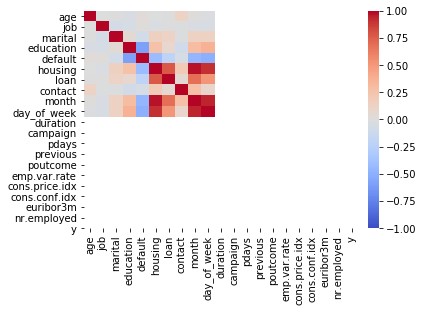

In [401]:
corr=dataset.corr()
ax=sns.heatmap(corr,vmin=-1,vmax=1,cmap="coolwarm",xticklabels=dataset.columns,
               yticklabels=dataset.columns)

In [402]:
X = final.iloc[:,:-1]
y = final.iloc[:,-1:]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state =0)
X_train.isnull().sum()

nonexistent            0
success                0
mon                    0
thu                    0
tue                    0
wed                    0
aug                    0
dec                    0
jul                    0
jun                    0
mar                    0
may                    0
nov                    0
oct                    0
sep                    0
telephone              0
unknown                0
yes                    0
unknown                0
yes                    0
unknown                0
yes                    0
basic.6y               0
basic.9y               0
high.school            0
illiterate             0
professional.course    0
university.degree      0
unknown                0
married                0
single                 0
unknown                0
blue-collar            0
entrepreneur           0
housemaid              0
management             0
retired                0
self-employed          0
services               0
student                0


In [403]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [404]:
cols = ['age','duration','campaign','pdays','previous','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']

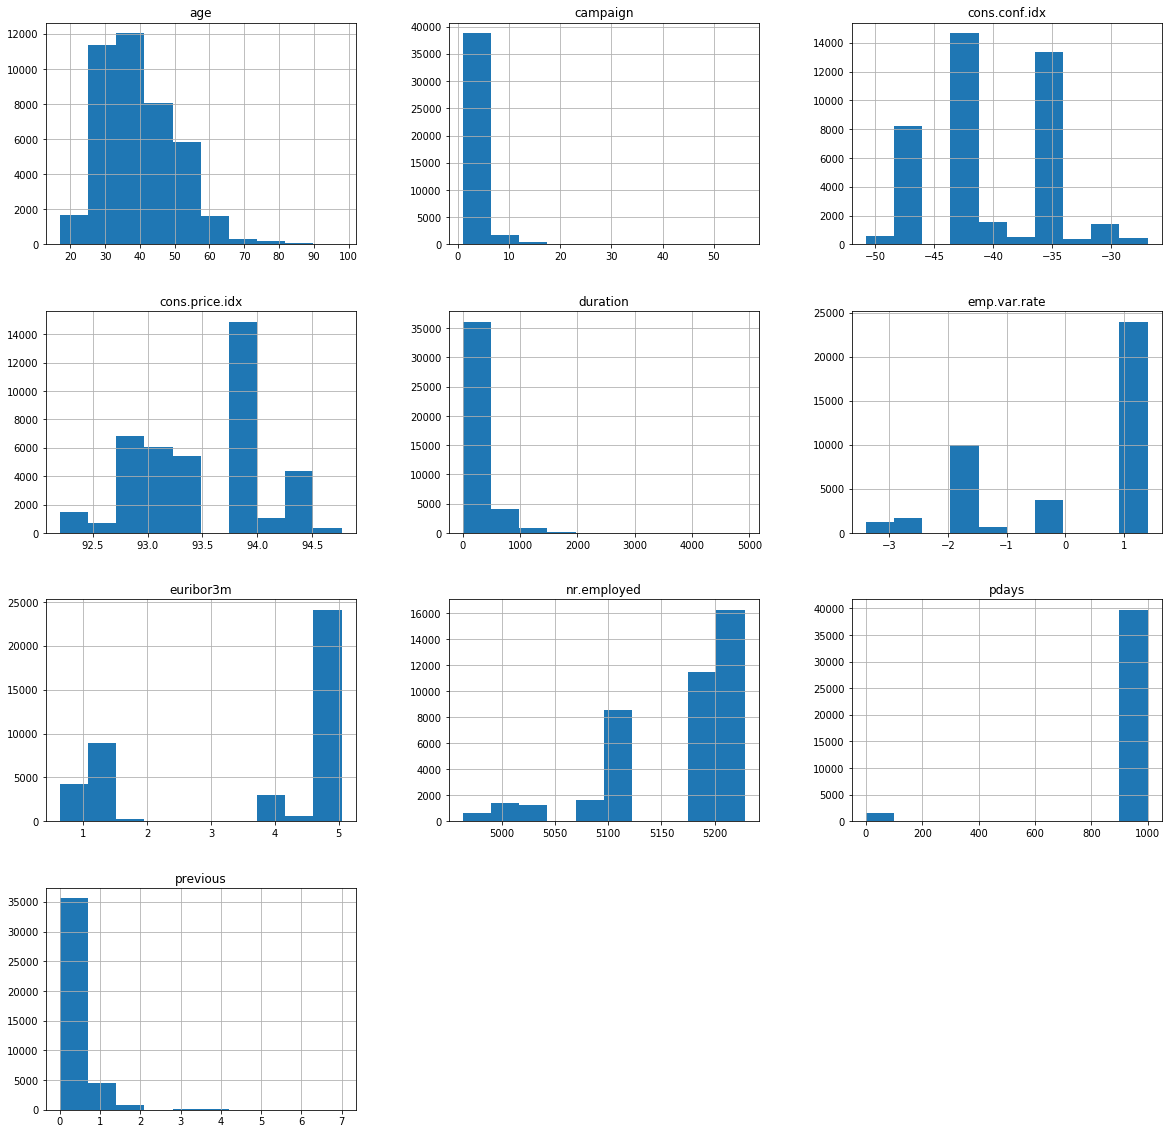

In [405]:
dataset[cols].hist(figsize=(20,20))
plt.show()

In [406]:
from sklearn.preprocessing import PowerTransformer
transformer = PowerTransformer(method = 'yeo-johnson',standardize=False)
transformer.fit(final[cols].fillna(1))
data_t = transformer.transform(final[cols].fillna(1))
data_t =pd.DataFrame(data_t,columns=cols)

final[cols] = data_t

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_data.py:2947: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:195: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:199: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:2963: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


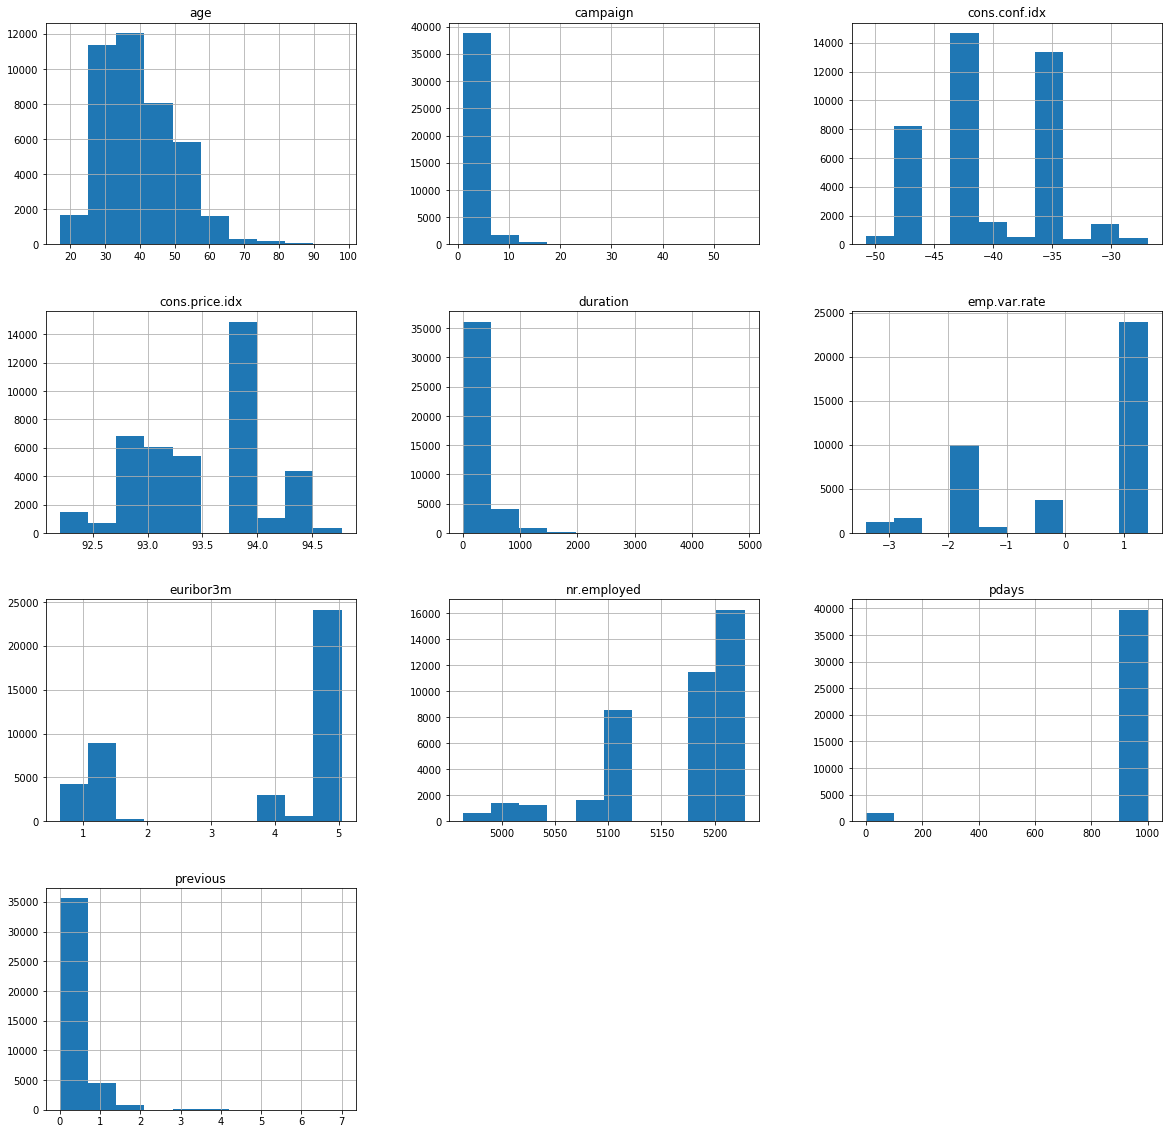

In [407]:
dataset[cols].hist(figsize=(20,20))
plt.show()

In [408]:
import scipy.stats as stats
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.distplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()



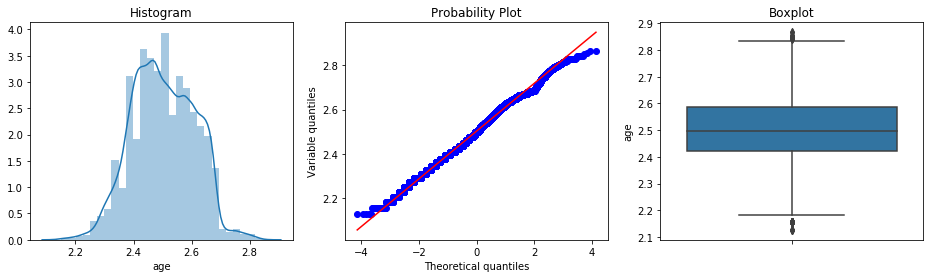

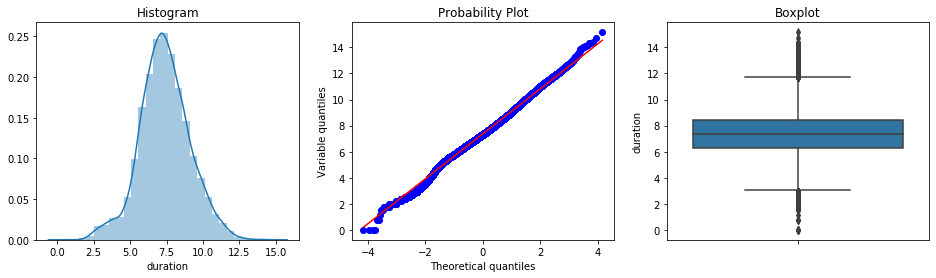

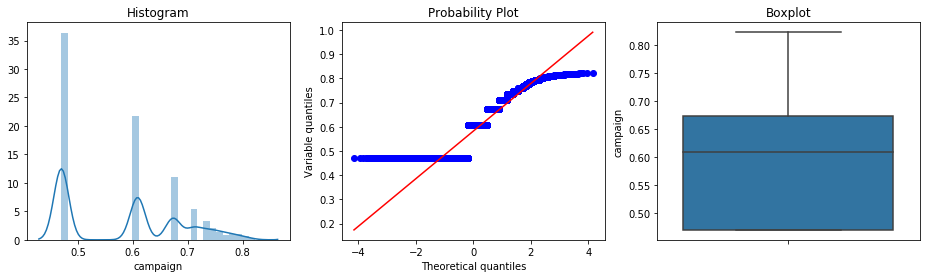

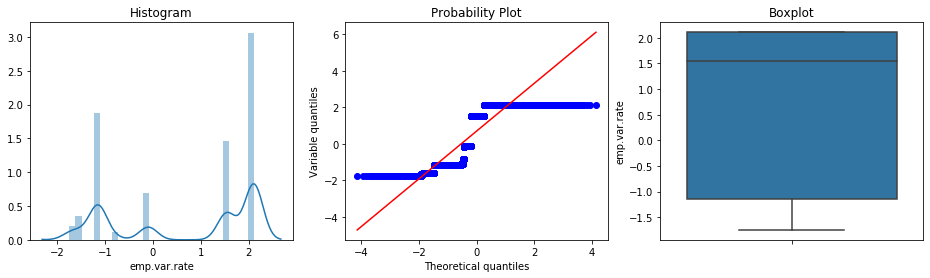

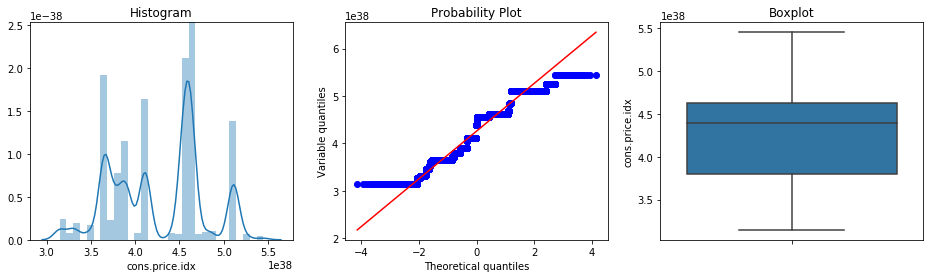

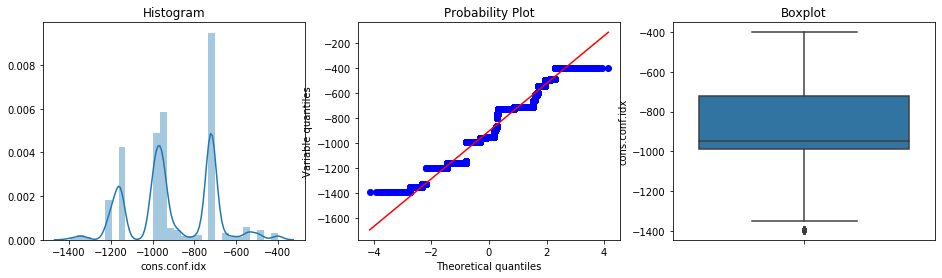

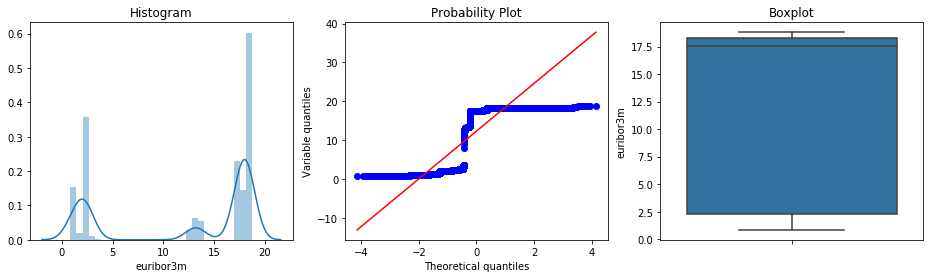

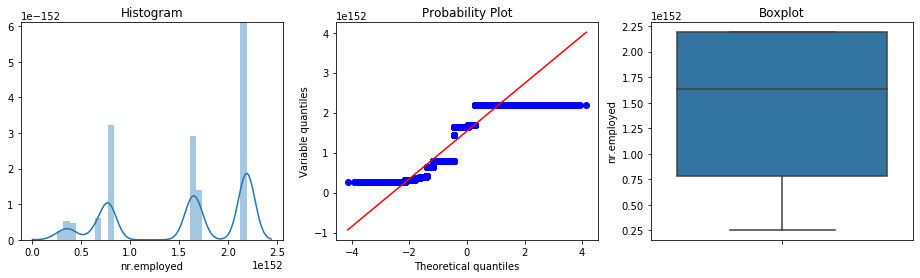

In [409]:
col = ['age','duration','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']
for val in col:
    diagnostic_plots(final, val)

In [410]:
def find_normal_boundaries(df, variable, distance):

    # calculate the boundaries outside which sit the outliers
    # for a Gaussian distribution

    upper_boundary = df[variable].mean() + distance * df[variable].std()
    lower_boundary = df[variable].mean() - distance * df[variable].std()

    return upper_boundary, lower_boundary

In [411]:
age_upper_limit, age_lower_limit = find_normal_boundaries(final, 'age', 3)
age_upper_limit, age_lower_limit

(2.826776491100591, 2.1787798206094626)

In [412]:
duration_upper_limit, duration_lower_limit = find_normal_boundaries(final, 'duration', 3)
duration_upper_limit, duration_lower_limit

(12.566010363744798, 2.1820236446421513)

In [413]:
final['age']= np.where(final['age'] > age_upper_limit, age_upper_limit,
                       np.where(final['age'] < age_lower_limit, age_lower_limit, final['age']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [414]:
final['duration']= np.where(final['duration'] > duration_upper_limit, duration_upper_limit,
                       np.where(final['duration'] < duration_lower_limit, duration_lower_limit, final['duration']))

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


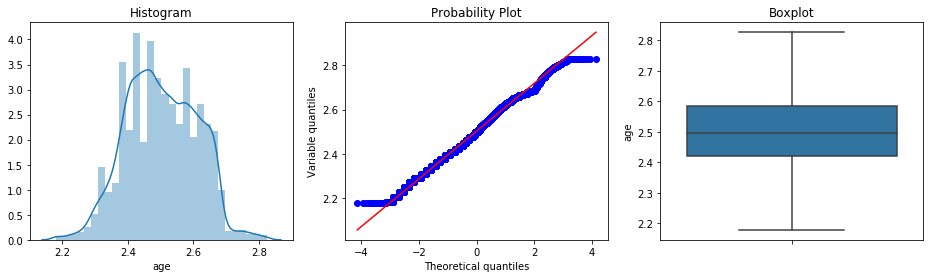

In [415]:
diagnostic_plots(final, 'age')

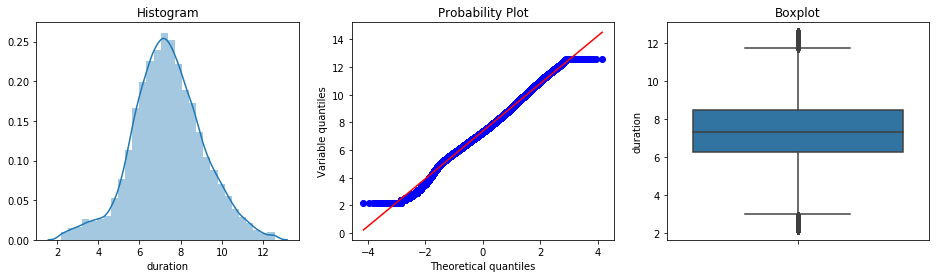

In [416]:
diagnostic_plots(final, 'duration')

In [417]:
from sklearn.svm import SVC
classifier = SVC(kernel='rbf',random_state=0,probability=True)
classifier.fit(X_train,y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=True, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [418]:
y_pred = classifier.predict(X_test)
y_pred1 = classifier.predict(X_train)

In [419]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[10730,   239],
       [  883,   505]], dtype=int64)

In [420]:
from sklearn.metrics import jaccard_similarity_score
print("Accuracy of train set : " + str(jaccard_similarity_score(y_train,y_pred1)))
print('Accuracy of test set : '+str(jaccard_similarity_score(y_test,y_pred)))

Accuracy of train set : 0.9240747806180847
Accuracy of test set : 0.9092012624423403


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:664: FutureWarning: jaccard_similarity_score has been deprecated and replaced with jaccard_score. It will be removed in version 0.23. This implementation has surprising behavior for binary and multiclass classification tasks.
  FutureWarning)


In [421]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     10969
         yes       0.68      0.36      0.47      1388

    accuracy                           0.91     12357
   macro avg       0.80      0.67      0.71     12357
weighted avg       0.90      0.91      0.90     12357



In [423]:
from sklearn import metrics
y_lprob=classifier.predict_proba(X_test)[:,1]
print('Roc-Auc score:' +str(metrics.roc_auc_score(y_test,y_lprob)))

Roc-Auc score:0.9310302179866077


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


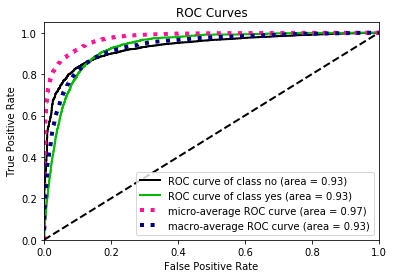

In [424]:
import scikitplot as skplt
y_probas = classifier.predict_proba(X_test)
skplt.metrics.plot_roc_curve(y_test, y_probas)
plt.show()